# HW1

# 2.a & 2.b

In [4]:
import pyes
import elasticsearch
import json
import time

#轉換範例
#a=time.strptime('Sun Feb 02 10:04:01 +0000 2014','%a %b %d %H:%M:%S +0000 %Y')
#print time.strftime("%Y-%m-%d %H:%M:%S",a)
#
es_address='192.168.1.232:9200'#112 http://140.118.139.60:9200/ 192.168.1.232:9200
conn = pyes.es.ES(es_address)
bq = pyes.query.BoolQuery() 
#q = pyes.query.MatchAllQuery()
tq = pyes.query.TermQuery(field="text", value="cve")
tq1 = pyes.query.TermQuery(field="text", value="exploit")
tq2 = pyes.query.TermQuery(field="text", value="vulnerability")

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:59 +0000 2014", 
                  include_lower=True ,include_upper=True)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_should(tq)
bq.add_should(tq1)
bq.add_should(tq2)
bq.add_must(rq)

result = conn.search(query= bq , indices='twitter2' , doc_types='tweet')
len(result)
day=[]
name=[]
url=0
nurl=0
totalname=[]
#分類帳戶 日期型態轉換 有無url數量統計
for i in result:
    name.append(i['user']['name'])
    day.append(int(time.strftime("%m",time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))))
    if i['entities']['urls'] == [] :
#    if i['user']['url'] == None :
        nurl=nurl+1
    else:
        url=url+1
for c in name:
    if c in totalname:
        continue
    else:
        totalname.append(c)
#result[0]['user']['name']
print 'tweets:',len(result)
print 'twitters:',len(totalname)
#for i in result:
    #print time.strftime("%m",time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
    #print i['user']['name']


tweets: 1421
twitters: 83


# 2.c & 2.d & 2.e 

Populating the interactive namespace from numpy and matplotlib
每個月參與Tweets數量長條圖:


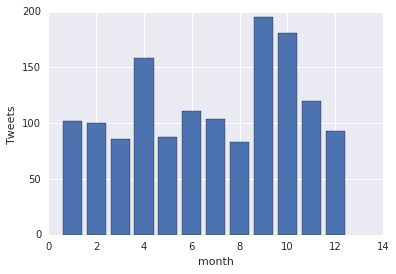

每個月參與的Twitter數量長條圖:


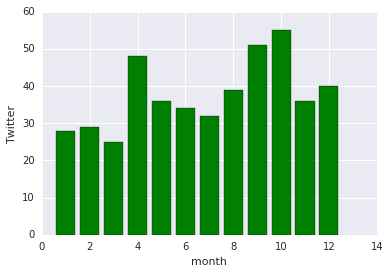

有URL與無URL的Tweets的比例圓餅圖:


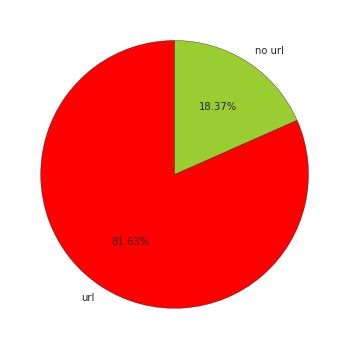

In [5]:
%pylab inline
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#每個月參與Tweets數量長條圖
df = pd.DataFrame({'name':name,
                   'month':day})
#print df.dtypes
#df['month'].hist(bins=range(1,14))
#plt.show()
count=[]
#print day.count(12)
for c in range(1,13):
    count.append(len(df.loc[df['month']==c]))
print '每個月參與Tweets數量長條圖:'
plt.xlabel(u"month")
plt.ylabel(u"Tweets")
plt.bar(left = (range(1,13)),height = (count),align="center")
plt.show()


#每個月參與的Twitter數量長條圖
dfte = pd.DataFrame(0,index=range(len(totalname)),columns=range(1,13))
dfte['name']=totalname
for c in xrange(len(name)):
    dfte.loc[dfte['name']==name[c],day[c]]=1
sum_row=dfte[range(1,13)].sum()
print '每個月參與的Twitter數量長條圖:'
plt.xlabel(u"month")
plt.ylabel(u"Twitter")
plt.bar(left = (sum_row.index),height = (sum_row),align="center",color='green')
plt.show()

#其中有URL與無URL的Tweets的比例圓餅圖
#调节图形大小，宽，高
plt.figure(figsize=(6,6))
labels = [u'url',u'no url']
#每个标签占多大，会自动去算百分比
sizes = [url,nurl]
colors = ['red','yellowgreen']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        labeldistance = 1.1,autopct = '%3.2f%%',shadow = False,
        startangle = 90,pctdistance = 0.6)
print '有URL與無URL的Tweets的比例圓餅圖:'
plt.show()

另外測試

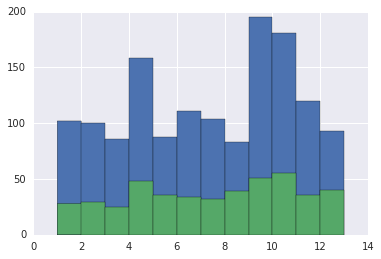

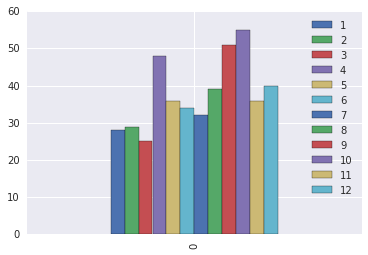

In [6]:
df['month'].hist(bins=range(1,14))
dftt=df[['name','month']].drop_duplicates()
dftt['month'].hist(bins=range(1,14))
df_sub_sum=pd.DataFrame(data=sum_row).T
df_sub_sum
df_sub_sum.plot.bar()

# 2.f箱型圖

In [136]:
bq = pyes.query.BoolQuery() 
#q = pyes.query.MatchAllQuery()
tq = pyes.query.TermQuery(field="text", value="cve")

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:59 +0000 2014", 
                  include_lower=True ,include_upper=True)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_must(tq)
bq.add_must(rq)
result2 = conn.search(query= bq , indices='twitter2' , doc_types='tweet')
print len(result2)
name2=[]
day2=[]
totalname2=[]
for i in result2:
    name2.append(i['user']['name'])
    day2.append(int(time.strftime("%m",time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))))
for c in name2:
    if c in totalname2:
        continue
    else:
        totalname2.append(c)
#print totalname2

265


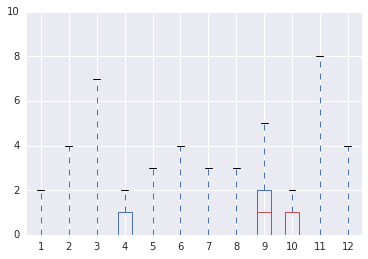

In [137]:
df2 = pd.DataFrame({'name':name2,
                   'month':day2})
df2
df3 = pd.DataFrame(0,index=totalname2,columns=range(1,13))
#df3['name']=totalname2
for c in xrange(len(name2)):
    df3.loc[df3.index==name2[c],day2[c]]+=1
#    df3.loc[df3['name']==name2[c],day2[c]]+=1
sum_row=df3[df3.columns].sum()
#df4=df3.T
#df4.loc[df4.ix[2]>0]
#箱形圖
df3.plot.box()

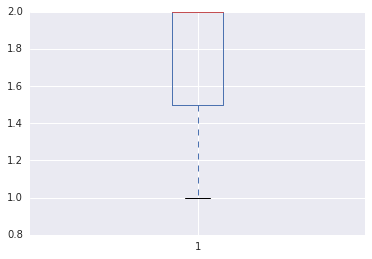

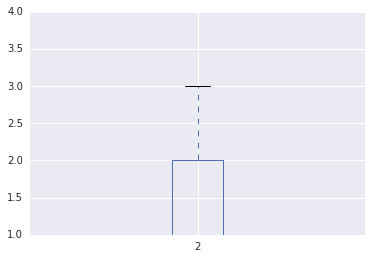

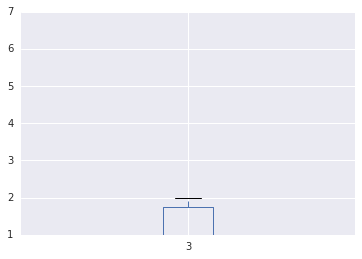

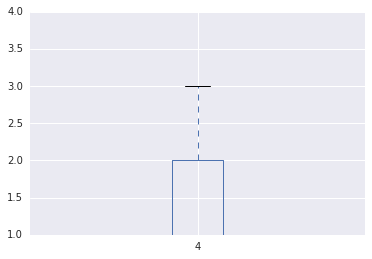

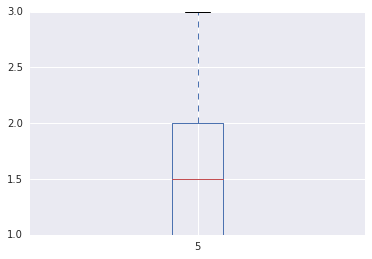

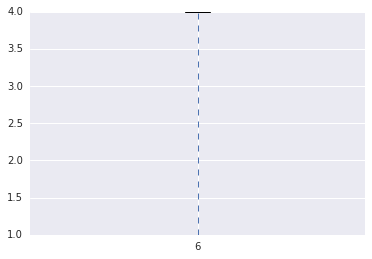

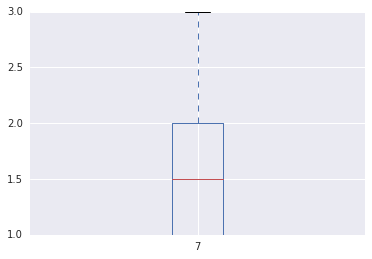

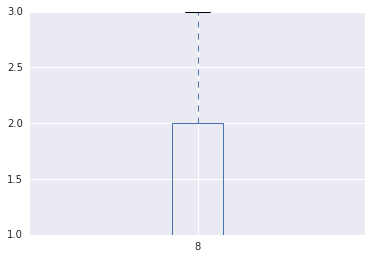

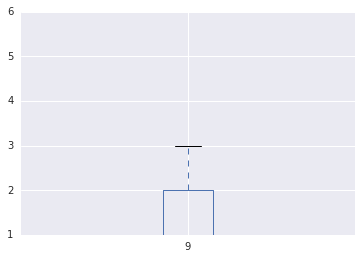

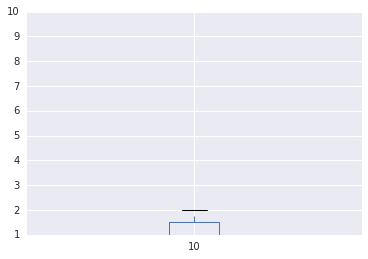

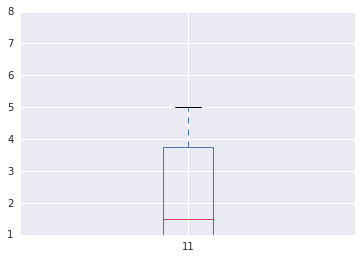

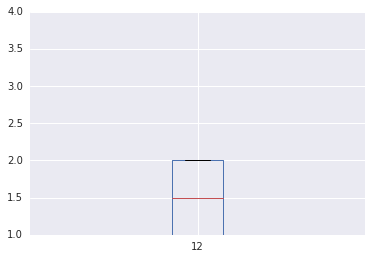

In [138]:
#篩選每月有發次數的帳號，個別針對每個月做箱形圖
for c in range(1,13):
    df4=df3.loc[df3[c]>0].T.ix[c]
    df5=pd.DataFrame(data=df4)
    df5.plot.box()

# 2.G
能否分析資安弱點分析指標帳號?如何分析?
可以分析資安弱點分析指標帳號，我們利用資安弱點來作為關鍵字，找出一個月發文總次數較多或一個月平均發文次數較多的帳號，再依據次數進行排序，就可以認定他們為指標帳號。

# 3

In [139]:
trainname =totalname2[2:22]#20筆帳號
dff = pd.DataFrame(0,index=trainname,columns=['cve','exploit','vulnerability','infosec'])
cll=['']*len(trainname)

for c in xrange(len(name2)):
    dff.loc[dff.index==name2[c],'cve']+=1
dff

,cve,exploit,vulnerability,infosec
BillBrenner70,10,0,0,0
Jeff Barr,3,0,0,0
Avram Marius,41,0,0,0
edskoudis,1,0,0,0
beist,3,0,0,0
Tim Strazzere,10,0,0,0
Ryan Barnett,5,0,0,0
Mikko Hypponen,10,0,0,0
Steve Ragan,2,0,0,0
Joshua Corman,2,0,0,0


In [140]:
bq = pyes.query.BoolQuery() 
#q = pyes.query.MatchAllQuery()
tq = pyes.query.TermQuery(field="text", value="exploit")

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:59 +0000 2014", 
                  include_lower=True ,include_upper=True)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_must(tq)
bq.add_must(rq)
result2 = conn.search(query= bq , indices='twitter2' , doc_types='tweet')
#print len(result2)
name2=[]
day2=[]
totalname2=[]
for i in result2:
    name2.append(i['user']['name'])
for c in xrange(len(name2)):
    dff.loc[dff.index==name2[c],'exploit']+=1

In [141]:
bq = pyes.query.BoolQuery() 
#q = pyes.query.MatchAllQuery()
tq = pyes.query.TermQuery(field="text", value="vulnerability")

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:59 +0000 2014", 
                  include_lower=True ,include_upper=True)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_must(tq)
bq.add_must(rq)
result2 = conn.search(query= bq , indices='twitter2' , doc_types='tweet')
#print len(result2)
name2=[]
day2=[]
totalname2=[]
for i in result2:
    name2.append(i['user']['name'])
for c in xrange(len(name2)):
    dff.loc[dff.index==name2[c],'vulnerability']+=1

In [142]:
bq = pyes.query.BoolQuery() 
#q = pyes.query.MatchAllQuery()
tq = pyes.query.TermQuery(field="text", value="infosec")

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:59 +0000 2014", 
                  include_lower=True ,include_upper=True)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_must(tq)
bq.add_must(rq)
result2 = conn.search(query= bq , indices='twitter2' , doc_types='tweet')
#print len(result2)
name2=[]
day2=[]
totalname2=[]
for i in result2:
    name2.append(i['user']['name'])
for c in xrange(len(name2)):
    dff.loc[dff.index==name2[c],'infosec']+=1

In [143]:
for c in xrange(len(dff.index)):
    for c1 in dff.columns:
        if dff.ix[c][c1]== max(dff.ix[c]):
            cll[c]=c1
dff.insert(4, "class", cll)
dff

,cve,exploit,vulnerability,infosec,class
BillBrenner70,10,1,17,54,infosec
Jeff Barr,3,0,1,0,cve
Avram Marius,41,29,38,16,cve
edskoudis,1,3,2,16,infosec
beist,3,3,0,5,infosec
Tim Strazzere,10,18,17,8,exploit
Ryan Barnett,5,7,7,2,vulnerability
Mikko Hypponen,10,6,9,4,cve
Steve Ragan,2,1,8,18,infosec
Joshua Corman,2,3,9,50,infosec


In [112]:
iris_data_clean = dff

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data_clean[['cve','exploit','vulnerability','infosec']].values#特徵

# Similarly, we can extract the classes
all_classes = iris_data_clean['class'].values#詞最多

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_classes[5]

# Here's what a subset of our inputs looks like:
print all_inputs[:5] #顯示5個
print all_classes[:5]

[[10  1 17 54]
 [ 3  0  1  0]
 [41 29 38 16]
 [ 1  3  2 16]
 [ 3  3  0  5]]
['infosec' 'cve' 'cve' 'infosec' 'infosec']


In [113]:
from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

In [115]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.80000000000000004

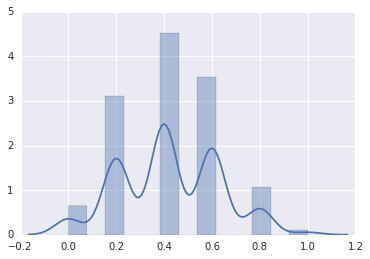

In [116]:
import seaborn as sb
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

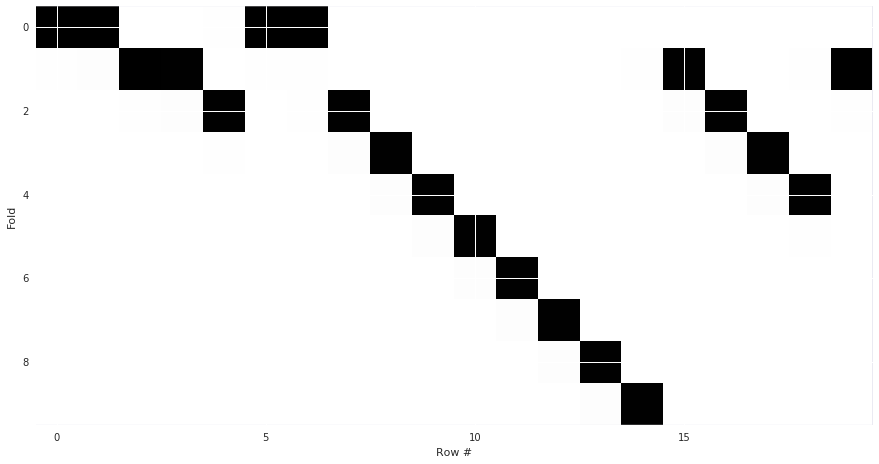

In [117]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))

In [133]:
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.6
Best parameters: {'max_features': 4, 'max_depth': 3}


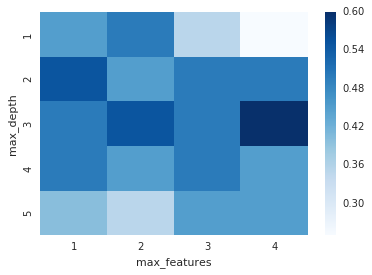

In [134]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')